### 127. Word Ladder

In [ ]:
class Solution:
    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        wordList = set(wordList)
        if endWord not in wordList: return 0

        queue = collections.deque()
        queue.append((beginWord,0))
        while queue:
            curr,d = queue.popleft()
            # every letter in the word
            for i in range(len(beginWord)):
                # every letter in the alphabet(lowercase)
                for j in range(26):
                    word = curr[:i] + chr(97+j) + curr[i+1:]
                    if word == endWord:
                        return d+2
                    if word in wordList:
                        queue.append((word,d+1))
                        wordList.remove(word)
        return 0

- The way this works is by constructing all possible words for a word, starting with `beginWord`, and branching based on the constructed word rather than iterating over `wordList` and comparing with every word.
- We perform a **Breadth-first search**, and using a doubly nested loop, we iterate over all possible words for the current word `curr`.
- When one of those potential words, `word`, is in the `wordList`, we add it to the `queue` to continue our search with that `word`.
- Once we encounter the `endWord`, we return the search depth `d` plus `2` to account for the `beginWord` and `endWord`.

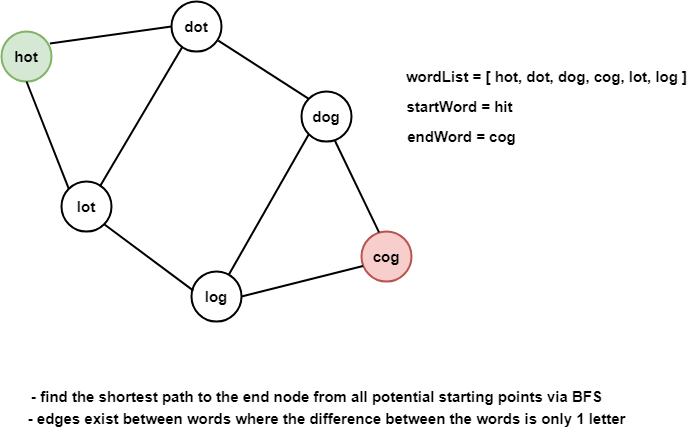

### 130. Surrounded Regions

In [ ]:
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        ROWS, COLS = len(board),len(board[0])
        visited = set()

        def bfs(row,col, fields):
            queue = collections.deque()
            queue.append((row,col))
            visited.add((row,col))

            while queue:
                r,c = queue.popleft()
                for row, col in [(r-1,c),(r,c+1),(r+1,c),(r,c-1)]:
                    if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited and board[row][col] == "O":
                        queue.append((row,col))
                        visited.add((row,col))
            return

        for row in range(ROWS):
            for col in range(COLS):
                if row == 0 or col == 0 or row == ROWS-1 or col == COLS-1:
                    if (row,col) not in visited and board[row][col] == "O":
                        bfs(row,col,"outer")

        for row in range(ROWS):
            for col in range(COLS):
                if (row,col) not in visited and board[row][col] == "O":
                    board[row][col] = "X"

- To solve this problem, I performed a **Breadth-first search** on every field at the edges of the `board`.
- Every field that has been marked `visited` after the initial searches have been completed will be exempt from being marked with an `"X"`.

### 133. Clone Graph

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node: return None
        if not node.neighbors: return Node(node.val, None)

        def bfs(node):
            # initialize our queues and visited dict
            queue = collections.deque()
            copyQueue = collections.deque()
            visited = dict()
            # create a copy of the first node and add it to the queue of copied nodes
            nodeCopy = Node(node.val, None)
            copyQueue.append(nodeCopy)
            # add the original first node to our queue and add the  original -> copy  entry into the visited dict
            queue.append(node)
            visited[node] = nodeCopy
            # perform a breadth first search of the given graph
            while queue:
                curr = queue.popleft()
                currCopy = copyQueue.popleft()
                for neighbor in curr.neighbors:
                    # if the current neighbor is not in the keys of the visited dict, that means a copy for it hasn't been created yet
                    if neighbor not in visited:
                        neighborCopy = Node(neighbor.val, None)
                        currCopy.neighbors.append(neighborCopy)
                        copyQueue.append(neighborCopy)

                        queue.append(neighbor)
                        visited[neighbor] = neighborCopy
                    # if it is in the keys of the visited dict, a copy of it has been created and is accessible via visited[neighbor]
                    else:
                        currCopy.neighbors.append(visited[neighbor])
            return nodeCopy

        return bfs(node)

- We perform a **Breadth-first search** over the given graph and create a copy of it in the process.
- A crucial aspect that allows this to work is the dictionary `visited` that we are using. This dictionary holds the original nodes of the graph as keys and their respective copies as values.
- Whenever we reach a `node` whose `neighbor` has already been copied, we can simply append the node's dictionary entry to the `neighbors` of the copy of the `node`, `currCopy`. 

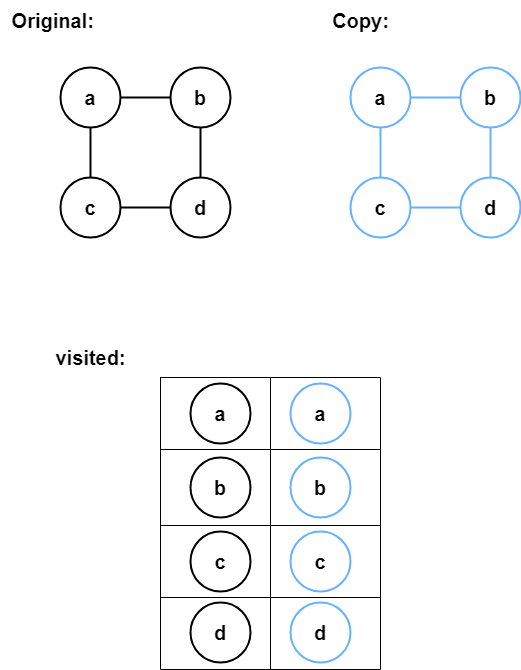

### 200. Number of Islands

In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        visited = set()

        def bfs(row, col):
            queue = collections.deque()
            visited.add((row, col))
            queue.append((row, col))

            while queue:
                row, col = queue.popleft()
                for r,c in [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]:
                    if not (r,c) in visited and r >= 0 and c >= 0 and r < ROWS and c < COLS and grid[r][c] == "1":
                        queue.append((r,c))
                        visited.add((r,c))

        res = 0
        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == "1" and not (row, col) in visited:
                    bfs(row, col)
                    res += 1
        return res

- This problem can be solved with the help of **Breadth-first search**.
- How it works is that we iterate over all fields in the `grid`, performing a BFS on every field iff it contains a `"1"` and has not been marked as `visited`.
- Furthermore, we keep track of the number of times that we performed a BFS in the variable `res` and return that as our result.

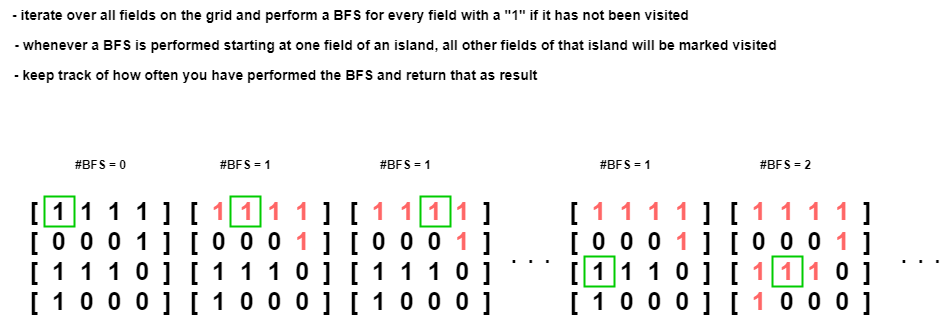

### 207. Course Schedule

In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        adjMap = { i: [] for i in range(numCourses) }
        for course, prereq in prerequisites:
            adjMap[course].append(prereq)
        visited = set()
        
        def dfs(course):
            if course in visited:
                return False
            if adjMap[course] == []:
                return True

            visited.add(course)
            for prereq in adjMap[course]:
                if not dfs(prereq): return False
            visited.remove(course)
            adjMap[course] = []
            return True

        for course in range(numCourses):
            if not dfs(course): return False
        return True

- We perform a **Depth-first search** through the directed graph represented by the `prerequisites`.
- The base case is that a `course` has no prerequisites, meaning that its entry in the adjacency map `adjMap` is an empty list.
- We also keep track of the current search path via the set `visited`, and whenever we encounter a node that is already on the path, we know that there is a cycle, which means that it is not possible to complete all courses.

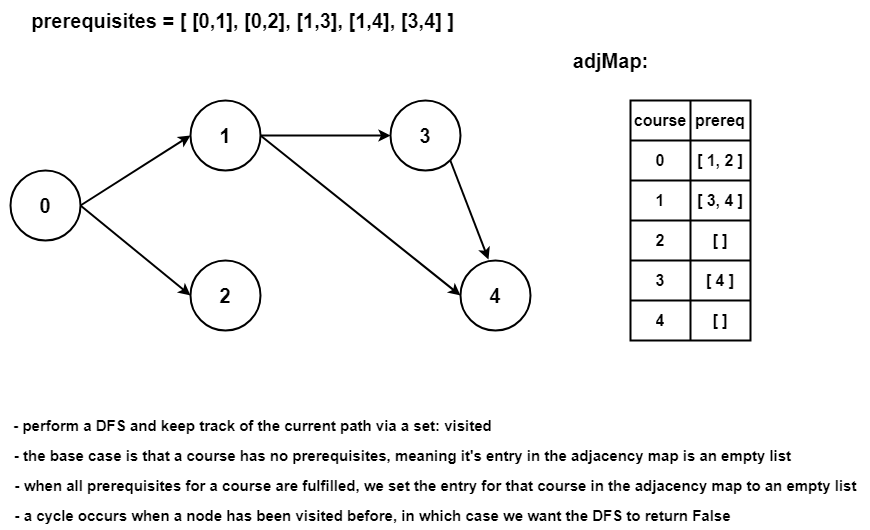

### 210. Course Schedule II

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        adjMap = { i: [] for i in range(numCourses) }
        for course, prereq in prerequisites:
            adjMap[course].append(prereq)
        visited = set()
        
        res, res_set = [], set()
        def dfs(course):
            if course in visited:
                return False
            if adjMap[course] == []:
                if course not in res_set: 
                    res_set.add(course)
                    res.append(course)
                return True

            visited.add(course)
            for prereq in adjMap[course]:
                if not dfs(prereq): return False
            visited.remove(course)
            if course not in res_set: 
                res_set.add(course)
                res.append(course)
            adjMap[course] = []
            return True

        for course in range(numCourses):
            if not dfs(course): return []
        return res

- The solution is mostly the same as above, with the difference that I am also keeping track of the order in which nodes are being visited via the variable `res`.

### 261. Graph Valid Tree

In [ ]:
class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        e = defaultdict(list)
        for n1,n2 in edges:
            e[n1].append(n2)
            e[n2].append(n1)

        # perform BFS to ensure that graph has 1 component
        queue,visited = collections.deque(),set()
        queue.append(0)
        visited.add(0)
        while queue:
            curr = queue.popleft()
            for nb in e[curr]:
                if nb not in visited:
                    queue.append(nb)
                    visited.add(nb)

        if len(visited) != n: return False

        # perform Union Find to ensure there are no cycles
        parents = list(range(n+1))
        ranks = [1]*(n+1)
        def find(n):
            p = parents[n]
            while p != parents[p]:
                p = parents[p]
            return p
        
        def union(n1,n2):
            p1,p2 = find(n1),find(n2)
            if p1 == p2: return False
            if ranks[p1] > ranks[p2]:
                parents[p2] = p1
                ranks[p1] += ranks[p2]
            else:
                parents[p1] = p2
                ranks[p2] += ranks[p1]
            return True

        for n1,n2 in edges:
            if not union(n1,n2): return False
        return True

- The way I approached this problem was to ensure that the given graph consists of one component and does not contain any cycles.
- For this, I have performed a **Breadth-first search** starting from node `0`. If the number of `visited` nodes is equal to the number of total nodes, `n`, the graph consists of one component.
- To ensure that there are no cycles, I used the **Union Find Algorithm**, which will return `False` if any of the `edges` are redundant (lead to a cycle).

### 286. Walls and Gates

In [ ]:
class Solution:
    def wallsAndGates(self, rooms: List[List[int]]) -> None:
        ROWS,COLS = len(rooms),len(rooms[0]) 

        def bfs(row,col):
            queue = collections.deque()
            visited = set()
            queue.append((row,col,1))
            visited.add((row,col))
            while queue:
                r,c,d = queue.popleft()
                for row,col in [(r-1,c),(r,c+1),(r+1,c),(r,c-1)]:
                    if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited and rooms[row][col] > 0:
                        if d < rooms[row][col]: rooms[row][col] = d
                        queue.append((row,col,d+1))
                        visited.add((row,col))

        for row in range(ROWS):
            for col in range(COLS):
                if rooms[row][col] == 0:
                    bfs(row,col)

- I had to solve this problem on *lintcode* instead because it is a premium problem.
- How it works is that we perform a simple **Breadth-first search** sequentially, starting on every field that contains a gate.
- Whenever we encounter a field that contains a value that is greater than the current search depth `d`, which represents the distance to the current gate, we replace it with `d`.

### 323. Number of Connected Components in an Undirected Graph

In [ ]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        e = defaultdict(list)
        for n1,n2 in edges:
            e[n1].append(n2)
            e[n2].append(n1)

        visited = set()
        def dfs(node):
            if e[node] == []:
                return
            
            visited.add(node)
            for n in e[node]:
                if n not in visited:
                    dfs(n)
            return

        components = 0
        for node in range(n):
            if node not in visited:
                dfs(node)
                components += 1

        return components

- I had to use *lintcode* to test my solution to this problem because it is a premium problem.
- The way it works is quite similar to the problem *200. Number of Islands*, in that we perform a **Depth-first search** on every node that has not been marked as `visited`, and in our DFS, every `node` in the specific component gets marked as `visited`.

### 332. Reconstruct Itinerary

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        
        # map that holds outgoing edges for every node
        adj_map = defaultdict(list)
        for u,v in tickets:
            adj_map[u].append(v)

        # lexicographically sort outgoing airports
        for node in adj_map:
            adj_map[node].sort()

        # perform dfs to construct the lexicographically smallest euler path
        res = collections.deque()
        def dfs(node):
            outgoing = adj_map[node]
            while outgoing:
                dfs(outgoing.pop(0))
            res.appendleft(node)
            return

        dfs("JFK")
        return res

- This problem could be solved with a **Depth-first search** over the `outgoing` edges for every `node`.
- We only append a `node` to the **Euler Path** we are trying to find once we have exhausted and searched through every `outgoing` flight for this `node`.
- That way, every edge will be on the **Euler Path** exactly once.

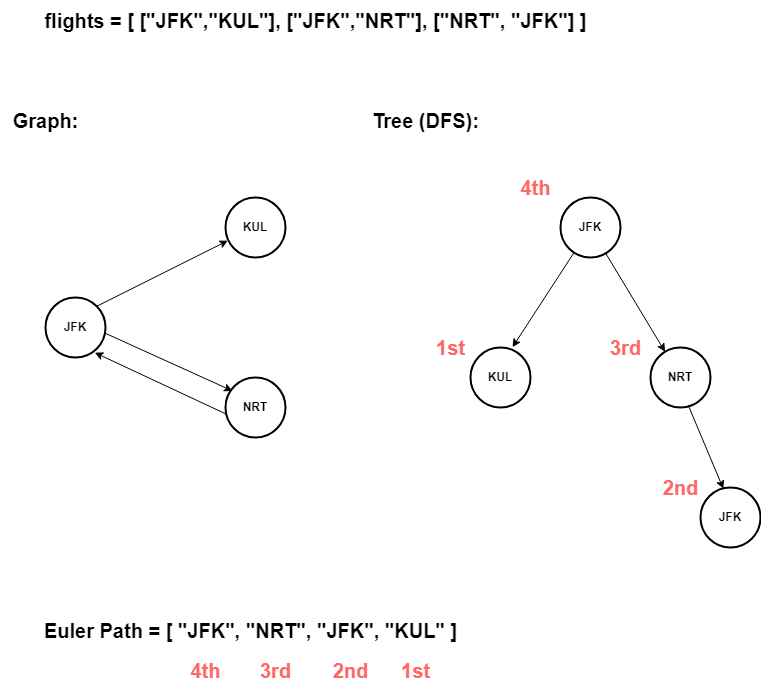

### 417. Pacific Atlantic Water Flow

In [ ]:
class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        ROWS,COLS = len(heights),len(heights[0])

        def dfs(row, col):
            queue = collections.deque()
            visited = set()
            queue.append((row,col))
            visited.add((row,col))
            PO = False
            AO = False

            while queue:
                if PO and AO: break

                r,c = queue.pop()
                currHeight = heights[r][c]
                for row, col in [ (r-1,c), (r,c+1), (r+1,c), (r,c-1) ]:
                    if row < 0 or col < 0:
                        PO = True
                    if row >= ROWS or col >= COLS:
                        AO = True
                    if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited and heights[row][col] <= currHeight:
                        queue.append((row,col))
                        visited.add((row,col))
            return PO and AO

        res = []
        for row in range(ROWS):
            for col in range(COLS):
                if dfs(row,col):
                    res.append([row,col])
        return res

- I performed a **Depth-first search** on every field of `heights` to solve this problem.
- Whenever a field is able to reach the Pacific Ocean (columns or rows below 0), we set the `PO` boolean to `True`, and whenever a field reaches the Atlantic Ocean (columns or rows exceeding the boundary of `heights`), we set the `AO` boolean to `True`. 
- We append a field to our result, `res`, when it is able to reach both the Pacific Ocean and the Atlantic Ocean.

### 542. 01 Matrix

In [ ]:
class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        ROWS,COLS = len(mat),len(mat[0])
        grid = [ [0]*COLS for _ in range(ROWS)]
        
        queue,visited = collections.deque(),set()
        for row in range(ROWS):
            for col in range(COLS):
                if mat[row][col] == 0:
                    queue.append((row,col,1))
                    visited.add((row,col))
    
        while queue:
            r,c,d = queue.popleft()
            for row,col in [ (r-1,c),(r,c+1),(r+1,c),(r,c-1) ]:
                if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited:
                    if mat[row][col] == 1: grid[row][col] = d 
                    queue.append((row,col,d+1))
                    visited.add((row,col))
        
        return grid

- This problem is very similar to the problem *994. Rotting Oranges* in that in both of them, you have to perform a **Breadth-first search with multiple starting points**.
- The starting points are all fields that contain a `0` and will be added to the `queue` and `visited` initially, and whenever we encounter a field with a `1` in our BFS, we set the value in that field to the search depth `d`.

### 684. Redundant Connection

In [ ]:
class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        par = [i for i in range(len(edges)+1)] # the number of nodes is equal to the number of edges
        rank = [1] * (len(edges)+1) # every node has a rank(size) of 1 initially 

        def find(n):
            p = par[n]
            # iterate up to a root node ( only ror root nodes: p == parent(p) )
            while p != par[p]:
                p = par[p]
            return p

        def union(n1, n2):
            p1, p2 = find(n1), find(n2)
            if p1 == p2:
                return False
            if rank[p1] > rank[p2]:
                par[p2] = p1
                rank[p1] += rank[p2]
            else:
                par[p1] = p2
                rank[p2] += rank[p1]
            return True

        for n1, n2 in edges:
            if not union(n1,n2):
                return [n1,n2]

- We are using the **Union Find** algorithm to solve this problem.
- How it works is best explained in the graphic below.

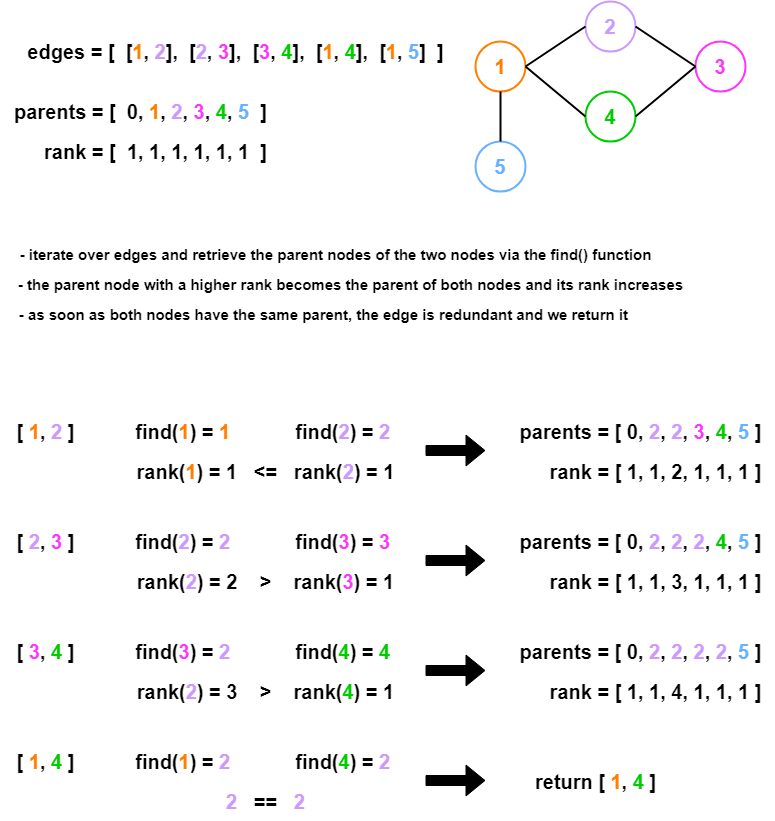

### 695. Max Area of Island

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        visited = set()
        def bfs(row, col):
            queue = collections.deque()
            queue.append((row, col))
            visited.add((row, col))
            islandSize = 1

            while queue:
                r, c = queue.popleft()
                for row, col in [ (r-1, c), (r, c+1), (r+1, c), (r, c-1) ]:
                    if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row, col) not in visited and grid[row][col] == 1:
                        queue.append((row, col))
                        visited.add((row, col))
                        islandSize += 1
            return islandSize

        maxIsland = 0
        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 1 and (row,col) not in visited:
                    islandSize = bfs(row, col)
                    if islandSize > maxIsland: maxIsland = islandSize

        return maxIsland

- This problem is very similar to *200. Number of Islands*, which I have solved above.
- The solution is also mostly the same, with the slight difference that we are keeping track of the size of every island that we visit via the variable `islandSize`, and we return the size of the largest island that we have encountered, `maxIsland`.

### 847. Shortest Path Visiting All Nodes

In [ ]:
class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        queue = collections.deque()
        visited = set()
        for i in range(len(graph)):
            visited.add((1 << i, i))
            queue.append((1 << i, i, 0))

        while queue:
            bitmask, node, depth = queue.popleft()
            # this is asking whether the bitmask has all 1's set  i.e. 2**4 -1 == bin'1111'
            if bitmask == 2 ** len(graph) - 1:
                break
            for neighbor in graph[node]:
                new_bitmask = bitmask | (1 << neighbor)
                if (new_bitmask, neighbor) in visited:
                    continue
                visited.add((new_bitmask, neighbor))
                queue.append((new_bitmask, neighbor, depth + 1))

        return depth

- This problem could be solved via a slightly modified version of **Breadth-first search with multiple starting points**.
- Instead of marking a `node` as `visited` if we simply encounter it, we mark a `node` as `visited` in combination with its `bitmask`, which **shows the nodes that have been visited** in order to reach this node.
- We also keep track of the **search depth** via the variable `depth` and return it once we encounter the first `node` with a `bitmask` that is fully set, meaning that **all nodes have been visited** along the path to reach this node.
- The reason we return `depth` is because it represents the length of the path that led to the `node` with the fully set `bitmask`.

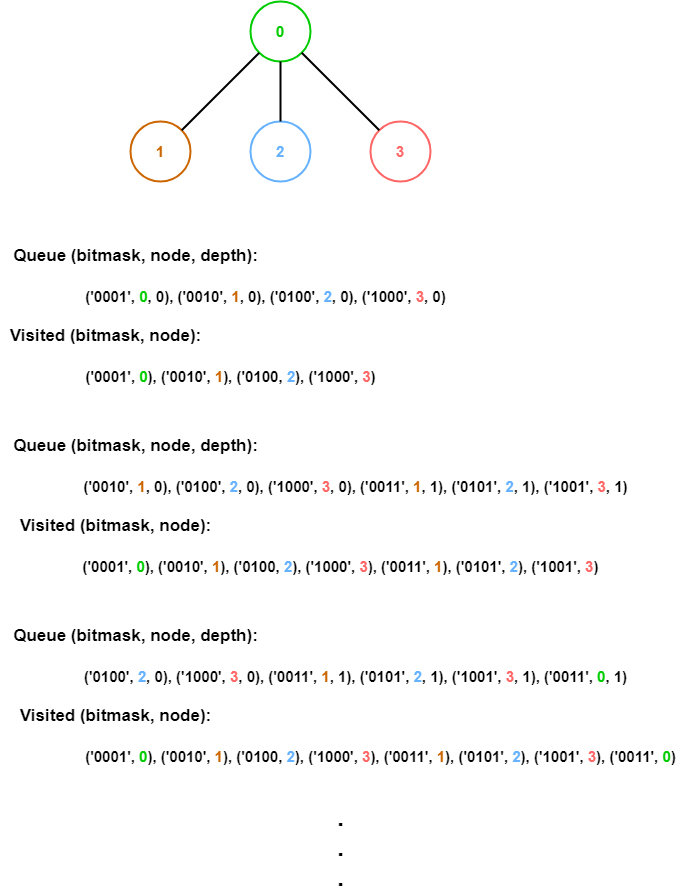

### 994. Rotting Oranges

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        visited = set()
        queue = collections.deque()
        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 2:
                    queue.append((row,col,0))
                    visited.add((row,col))

        depth = 0
        while queue:
            r,c,d = queue.popleft()
            if d > depth: depth += 1

            for row,col in [(r-1,c),(r,c+1),(r+1,c),(r,c-1)]:
                if row >= 0 and col >= 0 and row < ROWS and col < COLS and grid[row][col] == 1 and (row,col) not in visited:
                    queue.append((row,col,d+1))
                    visited.add((row,col))
                    grid[row][col] = 2  # mark orange as rotten

        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 1:
                    return -1

        return depth

- How I solved this problem was by performing a **Breadth-first search** after adding every rotting orange of the initial `grid` to the `queue` and the set of `visited` nodes.
- I also had to keep track of the search depth via the variable `depth`, because this will be the same as the number of `minutes` it took until all oranges were rotten.
- Lastly, if any orange had been spared from being rotten because it was never adjacent to a rotting orange, we return `-1`.

### 1203. Sort Items by Groups Respecting Dependencies

In [ ]:
class Solution:
    def kahn(self, nodes, constraints):
        in_degree = defaultdict(int)
        edges = defaultdict(list)
        for n1,n2 in constraints:
            edges[n1].append(n2)
        print('\n---------KAHN-------------')
        print(f'nodes: {nodes}  constraints: {constraints}')
        print(f'in_degree: {dict(in_degree)}  edges: {dict(edges)}')

        # calculate in degrees for all nodes
        for n1 in edges:
            for n2 in edges[n1]:
                in_degree[n2] += 1

        # put all nodes with an in degree of 0 into the queue
        queue = collections.deque()
        for node in nodes:
            if in_degree[node] == 0:
                queue.append(node)

        # perform kahn's algorithm (sequentially removing nodes when they have in degree 0)
        count,ordering = 0,[]
        while queue:
            n1 = queue.popleft()
            ordering.append(n1)

            for n2 in edges[n1]:
                in_degree[n2] -= 1
                if in_degree[n2] == 0: queue.append(n2)
            count += 1

        # if there are still nodes left, we have a cycle, in which case we return an empty list
        if count != len(nodes): 
            print([])
            return []
        else: 
            print(ordering)
            return ordering


    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        groups = defaultdict(list)
        internal_constraints,external_constraints = defaultdict(list),[]
        z_list = list(zip(group, beforeItems))

        # construct the dictionary 'groups' that holds each group with a unique identifier
        unique = -1
        for i in range(len(group)):
            if group[i] == -1:
                groups[unique].append(i)
                group[i] = unique
                unique -= 1
            else:
                groups[group[i]].append(i)

        # construct internal cosntraints for each group and external constraints for all groups
        for item,t in enumerate(z_list):
            for before in t[1]:
                if group[item] == group[before]:
                    internal_constraints[group[item]].append([before,item])
                else:
                    external_constraints.append([group[before],group[item]])
        print(f'zipped list:          {z_list}\ngroups:               {dict(groups)}\ninternal constraints: {dict(internal_constraints)}\nexternal constraints: {external_constraints}')

        # Step 1: fulfill internal constraints
        for group in internal_constraints.keys():
            sorted_group = self.kahn(groups[group], internal_constraints[group])
            if not sorted_group: return sorted_group
            groups[group] = sorted_group
        print(f'\ngroups (step 1):      {dict(groups)}')

        # Step 2: fulfill external constraints 
        sorted_groups = []
        if external_constraints:
            nodes = list(set([ group for constraint in external_constraints for group in constraint ]))
            sorted_groups = self.kahn(nodes, external_constraints)
            if not sorted_groups: return sorted_groups
        print(f'\ngroups (step 2):      {dict(groups)}')

        # Step 3: return result
        res = []
        for group in sorted_groups:
            res.append(groups[group])
        for group in groups.values():
            if group not in res: res.append(group)
        res_flat = []
        for l in res:
            res_flat += l
        
        return res_flat

- Wow, I feel like I have been able to learn a lot from this problem; it certainly took a while to complete.
- First, we extract the internal constraints (how do nodes have to be rearranged within groups) and the external constraints (how do the groups have to be rearranged) from the given `group` and `beforeItems`.
- Then, we use **Kahn's Algorithm** to first rearrange the groups internally, using `internal_constraints`, and then rearrange the groups using `external_constraints`.

### 1584. Min Cost to Connect All Points

In [ ]:
class UnionFind:
    def __init__(self,nodes):
        self.parents = list(range(nodes+1))
        self.ranks = [1]*(nodes+1)

    def find(self,node):
        p = self.parents[node]
        while p != self.parents[p]:
            p = self.parents[self.parents[p]]
            p = self.parents[p]
        return p
        
    def union(self,n1,n2):
        p1,p2 = self.find(n1),self.find(n2)
        if p1 == p2: 
            return False
        elif self.ranks[p1] > self.ranks[p2]:
            self.ranks[p1] += self.ranks[p2]
            self.parents[p2] = p1
        elif self.ranks[p1] <= self.ranks[p2]:
            self.ranks[p2] += self.ranks[p1]
            self.parents[p1] = p2
        return True
        

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        edges = []
        for x1,y1 in points:
            for x2,y2 in points:
                if x1 != x2 or y1 != y2:
                    edges.append(([x1,y1],[x2,y2],abs(x1-x2)+abs(y1-y2)))
        
        alias = dict()
        for i,point in enumerate(points):
            alias[tuple(point)] = i+1
        
        uf = UnionFind(len(points))
        edges.sort(key=lambda x: x[2])
        
        res = 0
        for p1,p2,w in edges:
            if uf.union(alias[tuple(p1)],alias[tuple(p2)]):
                res += w

        return res

- This problem could be solved by finding a **Minimum Spanning Tree** using **Kruskal's Algorithm**.
- First, we create a list, `edges`, containing every possible edge between the given `points` and their weights.
- Then, we apply **Kruskal's Algorithm** to find an **MST**, which gets facilitated by our implementation of the **Union Find Algorithm**, which tells us whether adding an edge would result in a cycle.

### 1615. Maximal Network Rank

In [ ]:
class Solution:
    def maximalNetworkRank(self, n: int, roads: List[List[int]]) -> int:
        if len(roads) == 0: return 0
        
        adjMap = defaultdict(list)
        for e1,e2 in roads:
            adjMap[e1].append(e2)
            adjMap[e2].append(e1)
            
        adjMap = dict(reversed(sorted(adjMap.items(), key=lambda item: len(item[1]))))
        nodes = list(adjMap.keys())
        l0,l1 = len(adjMap[nodes[0]]),len(adjMap[nodes[1]])
        maxV = 0
        
        for i in range(len(nodes)):
            ni_edges = adjMap[nodes[i]]
            if len(ni_edges) != l0: break

            for j in range(i+1,len(nodes)):
                nj_edges = adjMap[nodes[j]]
                if len(nj_edges) != l1: break

                sumV = len(ni_edges) + len(nj_edges)
                sumV = sumV-1 if nodes[j] in adjMap[nodes[i]] else sumV
                if sumV > maxV: maxV = sumV
        
        return maxV

- We create an adjacency map, `adjMap`, that holds a list of connected edges for every node.
- Then we sort `adjMap` by the number of edges such that the nodes with the largest number of edges are at the front.
- Lastly, we have to iterate over all combinations of two nodes with the same number of edges as the top two nodes (`l0` and `l1`) to find two nodes that are not connected to each other.

### 1631. Path With Minimum Effort

In [ ]:
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        ROWS,COLS = len(heights),len(heights[0])
        dist_grid = [[float(inf)]*COLS for _ in range(ROWS)]
        dist_grid[0][0] = 0
        res = 0
        
        queue, visited = collections.deque([(0,0,0)]), {(0,0)}
        while queue:
            r,c,dist = queue.popleft()
            res = max(res,dist)
            if r == ROWS-1 and c == COLS-1: 
                break
            
            for row,col in [(r-1,c),(r,c+1),(r+1,c),(r,c-1)]:
                if row >= 0 and row < ROWS and col >= 0 and col < COLS:
                    dist = abs(heights[row][col]-heights[r][c])
                    if dist >= dist_grid[row][col]:
                        continue
                    dist_grid[row][col] = dist
                    bisect.insort(queue,(row,col,dist),key=lambda x: x[2])
                    
        return res

- This problem could be solved with a slightly modified version of **Breadth-first search**.
- The differences are that we are using a **Priority Queue** that is sorted by edge weights in non-descending order, and instead of using a `visited` set, we are using a distance map, `dist_grid`, so we can revisit nodes when we find a way to reach them with a lower edge weight.
- How it works exactly is further elaborated in the graphic below.

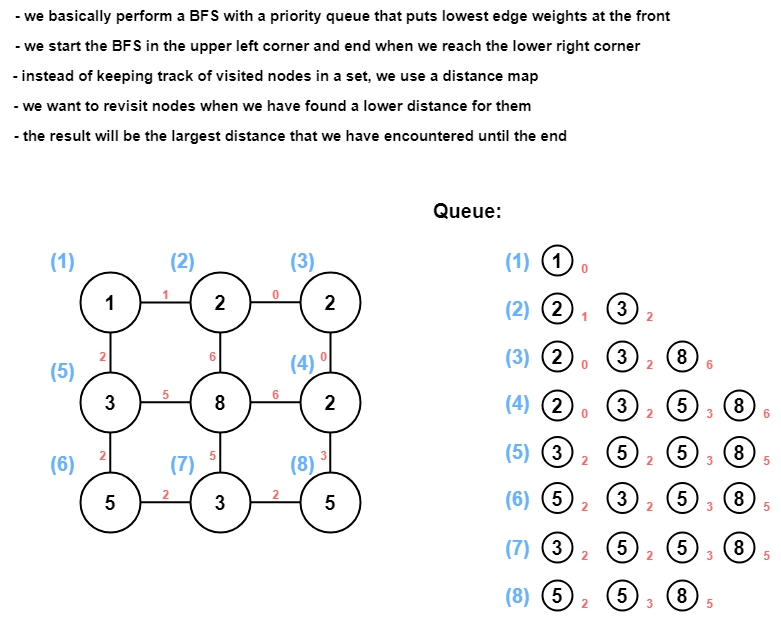